<a href="https://colab.research.google.com/github/Mano1498/Customer_Segmentation_Project/blob/main/Customer_segment(Kmeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [86]:
retail = pd.read_csv("/content/drive/MyDrive/DataSets/RFM2OnlineRetail.csv")

In [87]:
retail.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel
0,12820,2,59,942,1,2,2,5,Platinum
1,12821,213,6,93,4,4,4,12,Bronze
2,12822,70,46,949,3,2,2,7,Gold
3,12823,74,5,1760,3,4,1,8,Silver
4,12824,59,25,397,3,3,3,9,Silver


In [88]:
features = ["Recency","Frequency","Monetary"]

In [89]:
data = retail[features].copy()

In [90]:
data.describe()

,Recency,Frequency,Monetary
count,3179.000000,3179.000000,3179.000000
mean,92.512425,48.878893,742.894621
std,89.960711,45.965012,634.685987
min,0.000000,1.000000,4.000000
25%,22.000000,15.000000,267.000000
50%,58.000000,33.000000,530.000000
75%,149.500000,69.000000,1043.000000
max,329.000000,228.000000,2781.000000


<Axes: xlabel='Recency', ylabel='Count'>

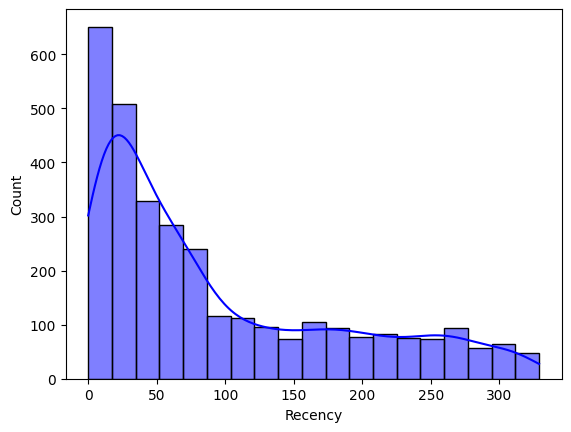

In [91]:
sns.histplot(data.Recency,kde=True,color="blue")

<Axes: xlabel='Frequency', ylabel='Count'>

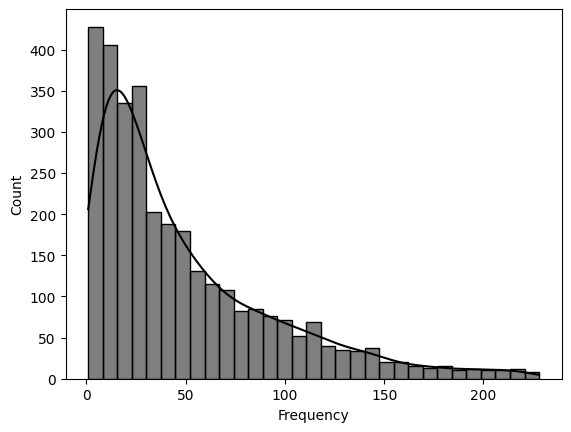

In [92]:
sns.histplot(data.Frequency,kde=True,color="black")

<Axes: xlabel='Monetary', ylabel='Count'>

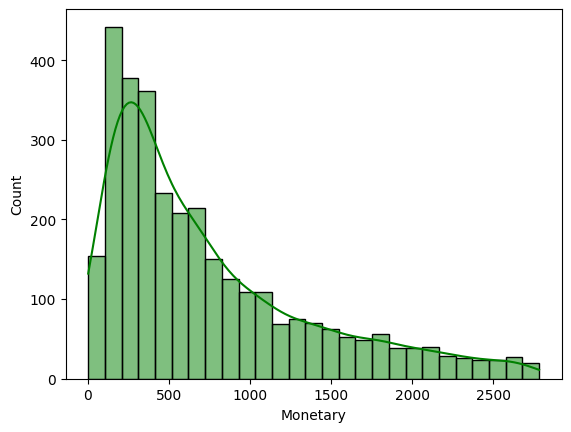

In [93]:
sns.histplot(data.Monetary,kde=True,color="green")

In [94]:
data["Recency"].replace(0,1,inplace=True)

In [95]:
data["Recency"].min()

1

Lambda value : 0.23921326158697623


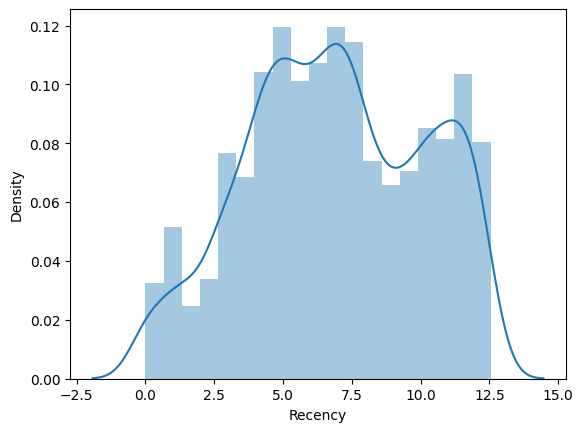

In [96]:
data["Recency"], lam_r = stats.boxcox(data["Recency"])
sns.distplot(data.Recency)
print("Lambda value :",lam_r)

Lambda value : 0.21730579181694484


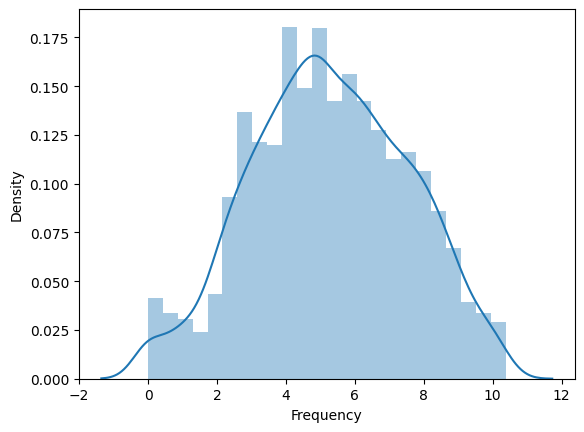

In [97]:
data["Frequency"], lam_f = stats.boxcox(data["Frequency"])
sns.distplot(data.Frequency)
print("Lambda value :",lam_f)

Lambda value : 0.1616365476662178


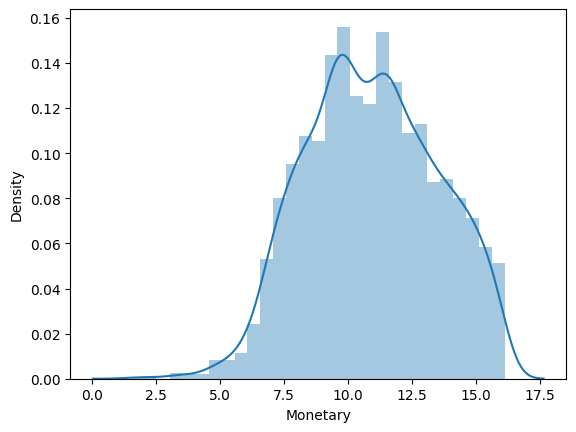

In [98]:
data["Monetary"], lam_m = stats.boxcox(data["Monetary"])
sns.distplot(data.Monetary)
print("Lambda value :",lam_m)

In [99]:
scl = StandardScaler()
c = ["Recency","Frequency","Monetary"]
data[c] = scl.fit_transform(data[c])

In [100]:
data.head()

,Recency,Frequency,Monetary
0,-1.913866,0.565076,0.631249
1,1.241106,-1.364817,-1.661527
2,0.144894,0.305520,0.640043
3,0.192992,-1.481350,1.412013
4,0.000871,-0.274070,-0.326043


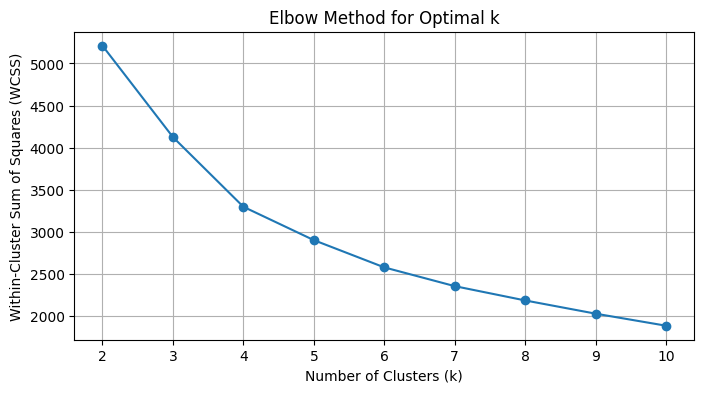

In [101]:
k_values = range(2, 11)
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [102]:
wcss

[5211.014663544951,
 4125.669277085845,
 3297.5029724453207,
 2901.2387914550454,
 2577.538802298009,
 2354.5882989536985,
 2184.65528812137,
 2027.5237607622516,
 1884.3785677348726]

In [103]:
kmeans = KMeans(n_clusters=5,max_iter= 100)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=5)

In [104]:
# For assigning labels
prd = kmeans.predict(data)

In [105]:
retail["Cluster_ID"] = prd

In [106]:
retail.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel,Cluster_ID
0,12820,2,59,942,1,2,2,5,Platinum,2
1,12821,213,6,93,4,4,4,12,Bronze,0
2,12822,70,46,949,3,2,2,7,Gold,3
3,12823,74,5,1760,3,4,1,8,Silver,3
4,12824,59,25,397,3,3,3,9,Silver,4


<Axes: xlabel='Cluster_ID', ylabel='Recency'>

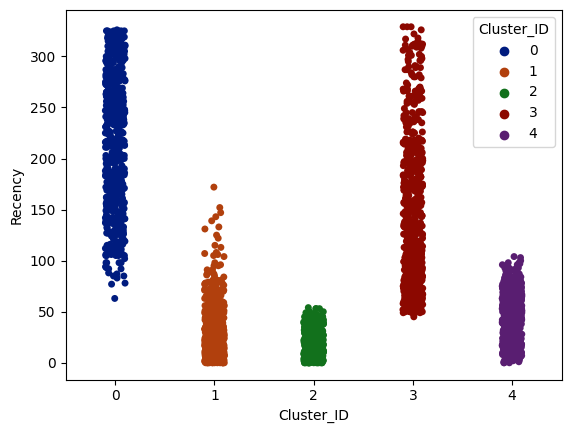

In [107]:
sns.stripplot(x="Cluster_ID",y="Recency",data=retail,hue="Cluster_ID", palette="dark")

<Axes: xlabel='Cluster_ID', ylabel='Frequency'>

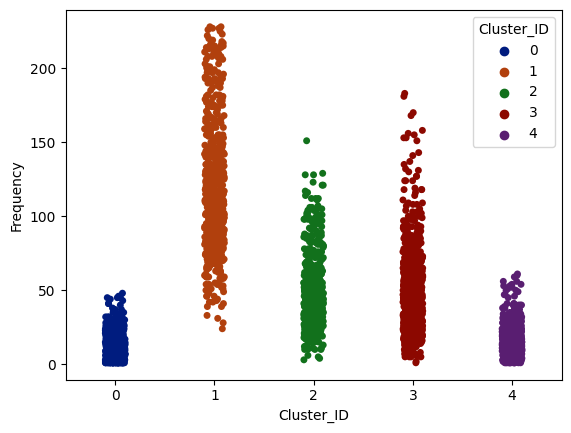

In [108]:
sns.stripplot(x="Cluster_ID",y="Frequency",data=retail,hue="Cluster_ID", palette="dark")

<Axes: xlabel='Cluster_ID', ylabel='Monetary'>

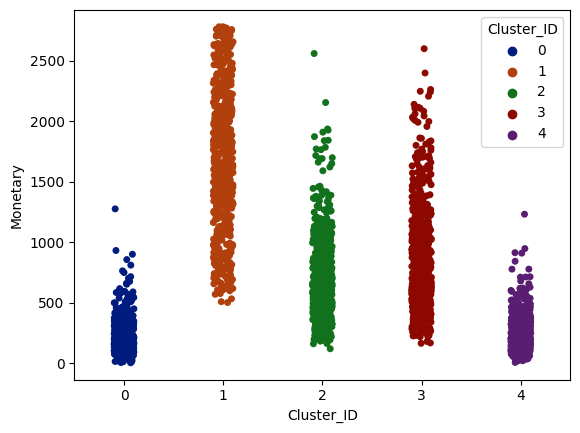

In [109]:
sns.stripplot(x="Cluster_ID",y="Monetary",data=retail,hue="Cluster_ID", palette="dark")

In [110]:
retail.groupby("Cluster_ID")["LoyaltyLevel"].value_counts()

Cluster_ID  LoyaltyLevel
0           Bronze          610
            Silver           25
1           Platinum        609
            Gold             13
2           Gold            304
            Platinum        248
            Silver           27
3           Gold            320
            Silver          306
            Bronze           61
            Platinum         42
4           Silver          354
            Bronze          215
            Gold             45
Name: LoyaltyLevel, dtype: int64

In [127]:
retail[kmeans.labels_ == 1][["CustomerID","LoyaltyLevel"] + features]

,CustomerID,LoyaltyLevel,Recency,Frequency,Monetary
5,12826,Platinum,2,91,1475
12,12836,Platinum,58,175,2613
14,12838,Platinum,33,123,683
15,12840,Platinum,143,113,2727
17,12843,Platinum,65,103,1702
...,...,...,...,...,...
3161,18257,Platinum,38,118,2338
3162,18259,Platinum,24,42,2339
3163,18260,Gold,172,134,2643
3166,18263,Platinum,25,61,1213


In [111]:
c0 = pd.DataFrame(retail[kmeans.labels_ == 0][["CustomerID","LoyaltyLevel"] + features])

In [112]:
c1 = pd.DataFrame(retail[kmeans.labels_ == 1][["CustomerID","LoyaltyLevel"] + features])

In [113]:
c2 = pd.DataFrame(retail[kmeans.labels_ == 2][["CustomerID","LoyaltyLevel"] + features])

In [114]:
c3 = pd.DataFrame(retail[kmeans.labels_ == 3][["CustomerID","LoyaltyLevel"] + features])

In [115]:
c4 = pd.DataFrame(retail[kmeans.labels_ == 4][["CustomerID","LoyaltyLevel"] + features])

In [116]:
c1.head()

,CustomerID,LoyaltyLevel,Recency,Frequency,Monetary
5,12826,Platinum,2,91,1475
12,12836,Platinum,58,175,2613
14,12838,Platinum,33,123,683
15,12840,Platinum,143,113,2727
17,12843,Platinum,65,103,1702


In [117]:
c1.describe()

,CustomerID,Recency,Frequency,Monetary
count,622.000000,622.000000,622.000000,622.000000
mean,15523.527331,29.181672,117.725080,1663.662379
std,1559.612405,26.813859,43.724617,584.774167
min,12826.000000,0.000000,24.000000,502.000000
25%,14219.250000,10.000000,85.000000,1225.500000
50%,15540.000000,22.500000,111.000000,1640.000000
75%,16896.250000,40.000000,143.000000,2102.750000
max,18287.000000,172.000000,228.000000,2781.000000


In [118]:
c1.describe(include="O")

,LoyaltyLevel
count,622
unique,2
top,Platinum
freq,609


In [119]:
c1["LoyaltyLevel"].value_counts()

Platinum    609
Gold         13
Name: LoyaltyLevel, dtype: int64

## Product Recommendation for each Clusters

In [120]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/cleanedOnlineRetail.csv")

In [121]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [122]:
merge = pd.merge(df[['CustomerID', 'Description', 'Quantity']], retail[['CustomerID',"Cluster_ID"]], on='CustomerID', how='inner')

In [123]:
merge.rename(columns={'Description': 'Product'}, inplace=True)

In [124]:
merge.head()

,CustomerID,Product,Quantity,Cluster_ID
0,13748.0,PAPER CHAIN KIT 50'S CHRISTMAS,80,3
1,13748.0,BISCUIT TIN VINTAGE GREEN,2,3
2,13748.0,ROUND CAKE TIN VINTAGE GREEN,2,3
3,13748.0,3 TIER CAKE TIN GREEN AND CREAM,2,3
4,13748.0,REGENCY CAKESTAND 3 TIER,2,3


In [126]:
recommendations_by_cluster = {}

for cluster_id in range(5):
    cluster_df = merge[merge['Cluster_ID'] == cluster_id]
    product_cluster = cluster_df.groupby("Product")["Quantity"].sum().reset_index()
    sorted_products = product_cluster.sort_values(by="Quantity", ascending=False)
    top_5_products = sorted_products.head(5)
    recommendations_by_cluster[cluster_id] = top_5_products

for cluster_id in range(5):
    cluster_recommendations = recommendations_by_cluster.get(cluster_id)
    print(f"Top 5 recommendations for Cluster {cluster_id}:\n{cluster_recommendations}\n")

Top 5 recommendations for Cluster 0:
                                 Product  Quantity
124            ASSORTED COLOURS SILK FAN      2456
768      GIRLS ALPHABET IRON ON PATCHES       2304
130    ASSORTED LAQUERED INCENSE HOLDERS      2043
1751      SMALL CERAMIC TOP STORAGE JAR       1418
1992  WHITE HANGING HEART T-LIGHT HOLDER      1190

Top 5 recommendations for Cluster 1:
                                 Product  Quantity
3209   WORLD WAR 2 GLIDERS ASSTD DESIGNS      7824
186        ASSORTED COLOUR BIRD ORNAMENT      4857
3131  WHITE HANGING HEART T-LIGHT HOLDER      4118
2131           PLACE SETTING WHITE HEART      4063
1471             JUMBO BAG RED RETROSPOT      3568

Top 5 recommendations for Cluster 2:
                                Product  Quantity
2417        SMALL CHINESE STYLE SCISSOR      8000
1712    PAPER CHAIN KIT 50'S CHRISTMAS       2053
2840  WORLD WAR 2 GLIDERS ASSTD DESIGNS      1920
162       ASSORTED COLOUR BIRD ORNAMENT      1822
2549       T-LIGHT GLASS 